## Cosmology I first test: Probes, Holes and Conservation laws

<ipython-input-19-bf9edd5be030>:16: RuntimeWarning: divide by zero encountered in double_scalars
  DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))


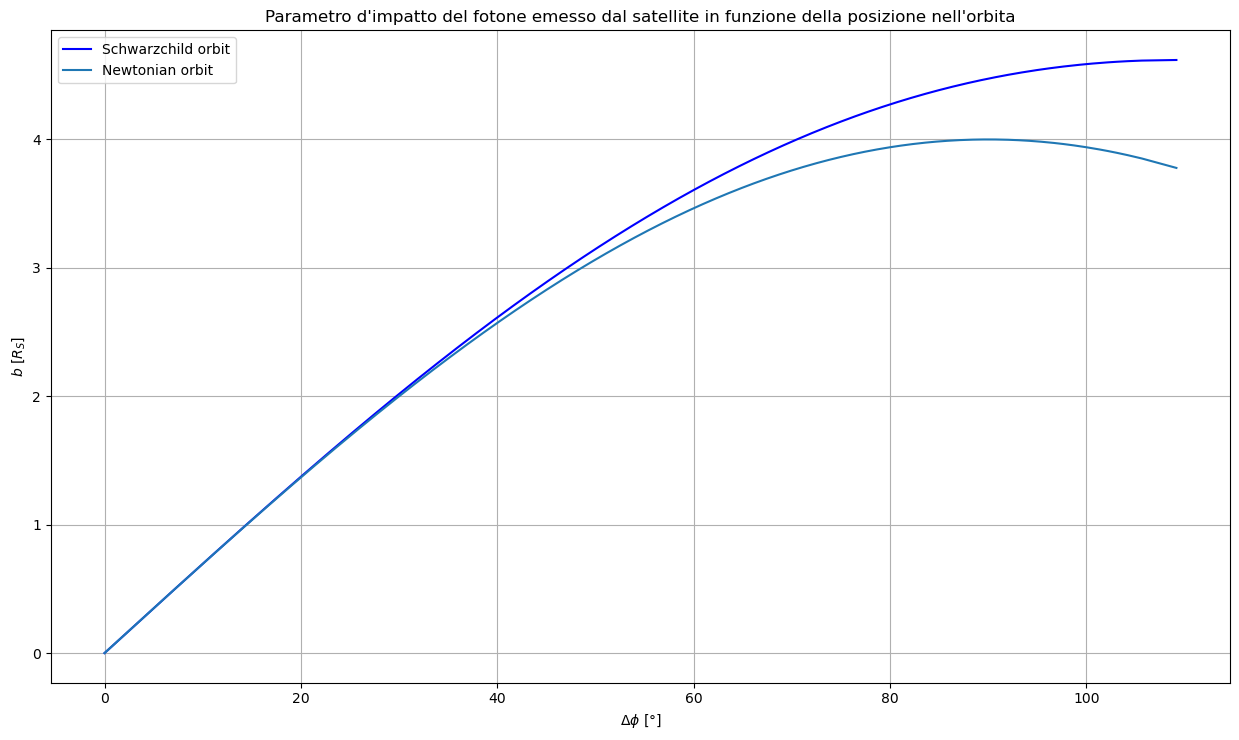

In [19]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import Figure, subplot
# Parameters of the Black Hole
Rsch=1. #Schwarzchild radius fixed to one
#GM=0.5*Rs #G*M: Fixed by relationship
Ratioprbsch=4# Defined in the problem
Rprobe=Ratioprbsch*Rsch #Radius of orbit: Fixed by problem
Robs=Rsch*2615589 #Distance of observer: Fixed by problem !!Check exact relationship from problem data
# Range of possible impact parameters. We plot only the positive half
Bmax=Rprobe*np.sqrt(Ratioprbsch/(Ratioprbsch-1))
B=np.linspace(0,Bmax,1000)#np.linspace(0,Rprobe,100)# 
DeltaPhi=[]
for b in B:
    DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))
#Graphs Stuff
plt.rcParams["figure.figsize"] = [12.50, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Parametro d'impatto del fotone emesso dal satellite in funzione della posizione nell'orbita")#plt.title("Impact parameter at a given angle")
A=plt.xlabel('$\Delta \phi$ [°]')
A=plt.ylabel('$b$ [$R_{S}$]')
plt.grid()
plt.plot(np.array(DeltaPhi)[:,0]*180/np.pi,B,color='b',label="Schwarzchild orbit")
plt.plot(np.array(DeltaPhi)[:,0]*180/np.pi,Rprobe*np.sin(np.array(DeltaPhi)[:,0]),label="Newtonian orbit")
plt.legend()
plt.show()

<ipython-input-20-8d6315440b04>:8: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.array(DeltaPhi)[:,0]*180/np.pi,np.divide(B-Rprobe*np.sin(np.array(DeltaPhi)[:,0]),B),label="Schwarzchild orbit")


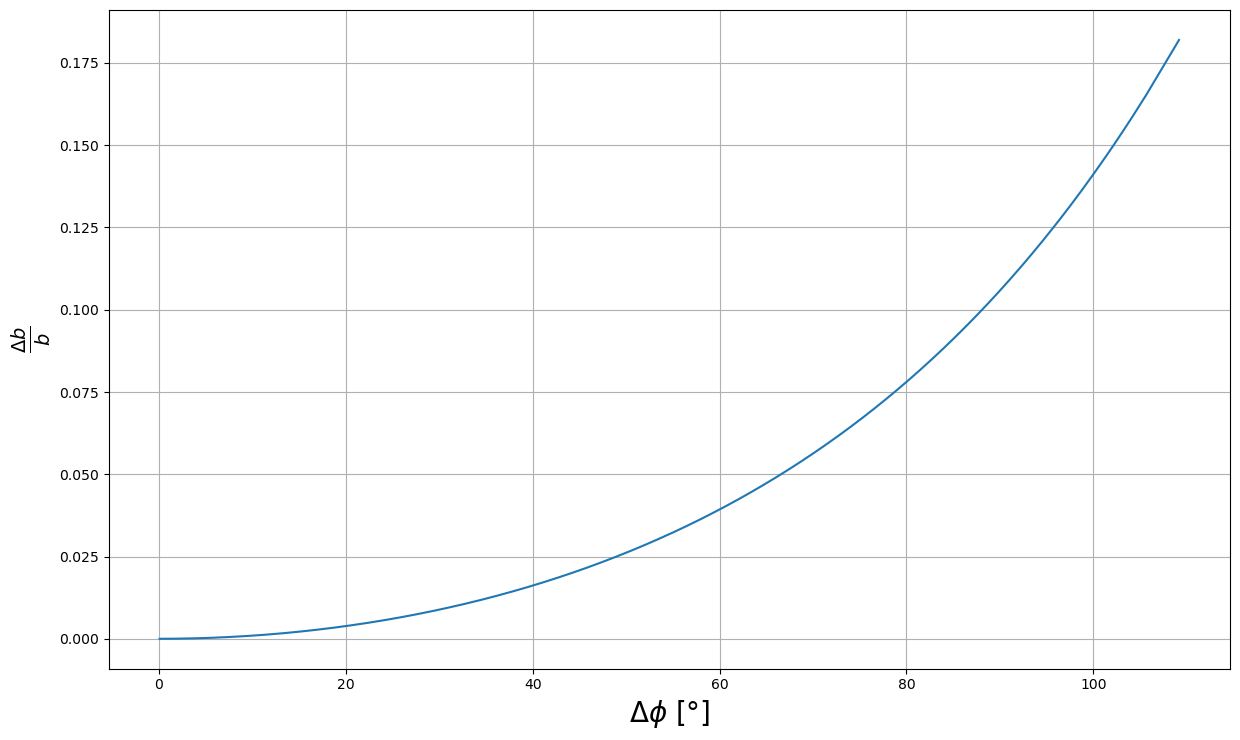

In [20]:
#Difference between the impact parameters expected in the Newtonian and relativistic case
plt.rcParams["figure.figsize"] = [12.50, 7.50]
plt.rcParams["figure.autolayout"] = True
#plt.title(r"$\frac {\Delta b}{b}$", fontsize=24)
A=plt.xlabel('$\Delta \phi$ [°]', fontsize=20)
A=plt.ylabel(r"$\frac {\Delta b}{b}$", fontsize=20)
plt.grid()
plt.plot(np.array(DeltaPhi)[:,0]*180/np.pi,np.divide(B-Rprobe*np.sin(np.array(DeltaPhi)[:,0]),B),label="Schwarzchild orbit")
plt.show()

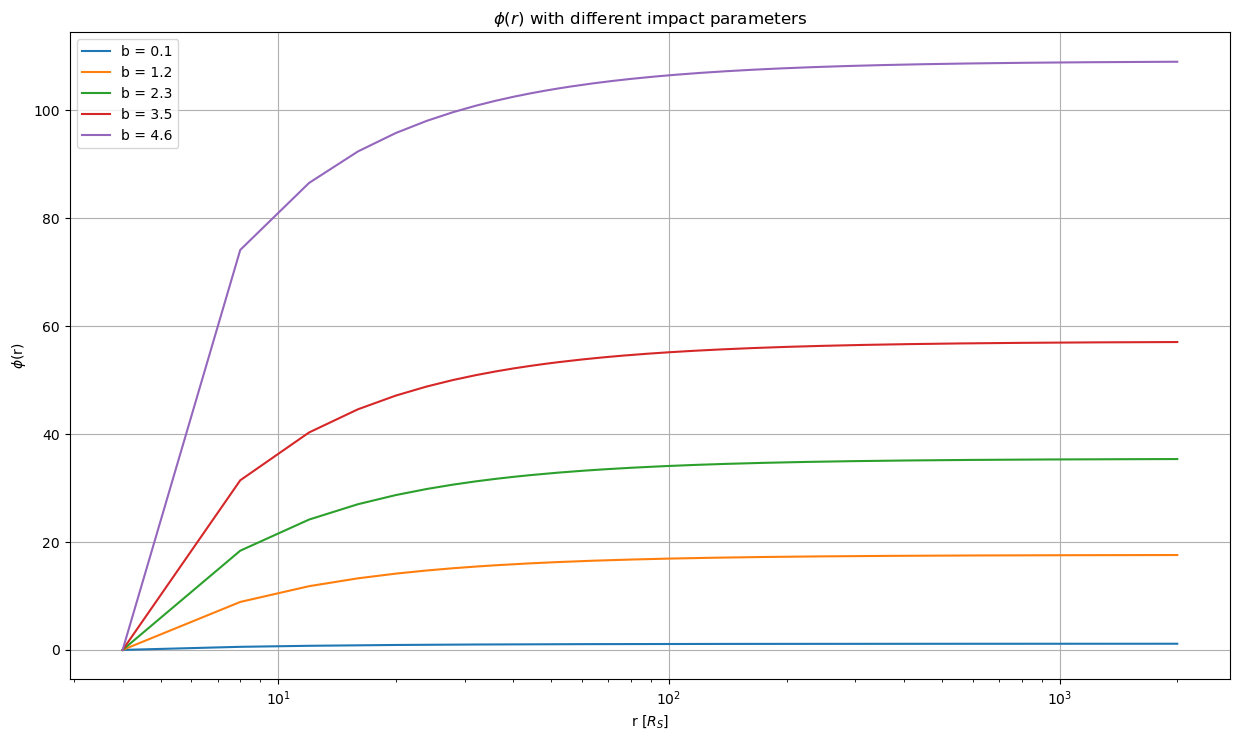

In [23]:
# Numerical evaluation parameters
NB=5# Number of different impact parameters considered
NR=500 # Number of evaluatioons of phi(r) in the considered interval
Bmin=Rprobe/50 #Minimum impact parameter. There's a singularity of the derivative for b=0
Rapprox=Rsch*2000#Integratin phi to the real value decreases the density of point in the intresting interval
# Parameters of the BH-probe system, defined before. 
B=np.linspace(Bmin,Bmax,NB) #B=np.logspace(np.log(Bmin),np.log(R),NB) 
Phi=np.empty([NB,NR])
Rmax=np.linspace(Rprobe,Rapprox,NR)

for i in range(len(B)):
    for j in range(len(Rmax)):
        Phi[i,j]=(integrate.quad(lambda x: 1/(x*np.sqrt((B[i]*x)**-2-1+x*Rsch)),  1/Rmax[j], 1/Rprobe))[0]

Blabel= "b = {Blab:.1f}"

for i in range(len(B)):
    plt.plot(Rmax,Phi[i,:]*180/np.pi,label=Blabel.format(Blab=B[i]))

#Graphs Stuff
plt.grid()
plt.legend()
plt.title("$\phi(r)$ with different impact parameters")
A=plt.ylabel(r'$\phi$(r)')
A=plt.xlabel('r [$R_{S}$]')
plt.xscale('log')
plt.show()

<ipython-input-26-f4e14472c297>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(1,1,1)


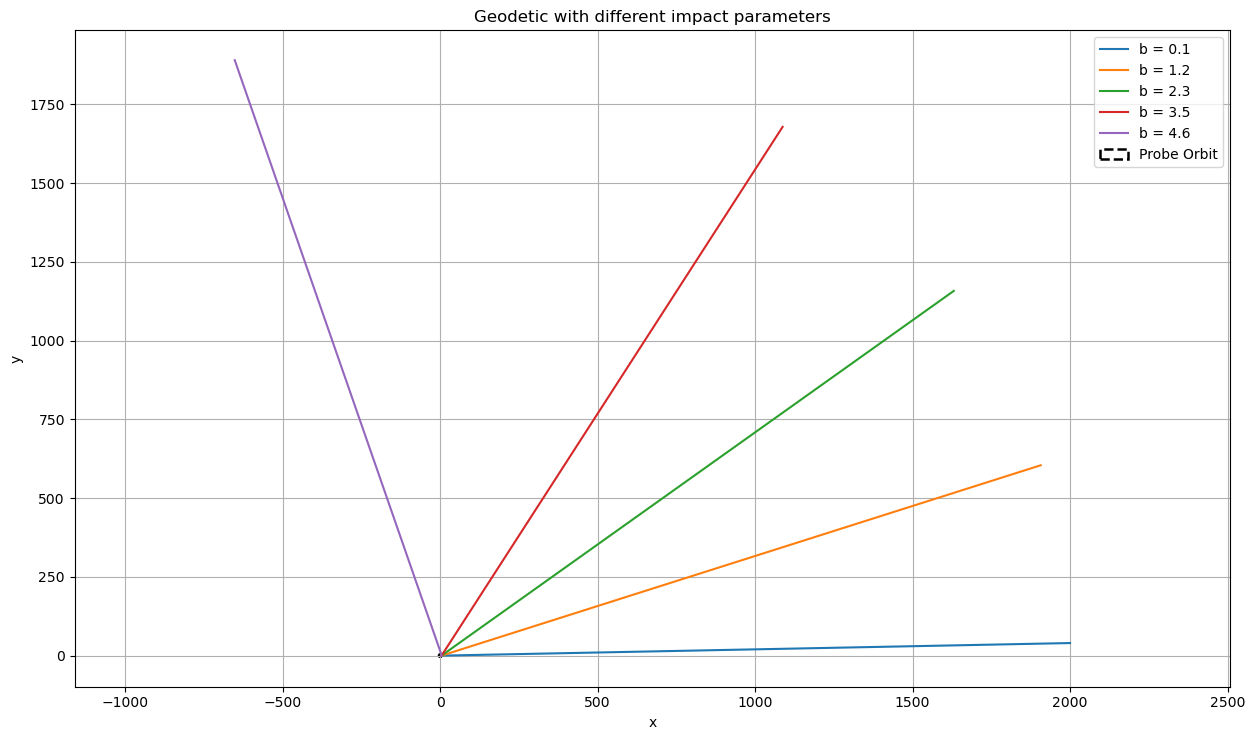

In [26]:
#convert coordinates
x=np.empty([NB,NR])
y=np.empty([NB,NR])
for i in range(len(B)):
    for j in range(len(Rmax)):
        x[i,j]=Rmax[j]*np.cos(Phi[i,j]) 
        y[i,j]=Rmax[j]*np.sin(Phi[i,j])
    plt.plot(x[i,:],y[i,:],label=Blabel.format(Blab=B[i]))  

fig=plt.figure(1)   
circ = plt.Circle((0, 0), Rprobe, color='black', fill=0, label='Probe Orbit', linestyle='--',linewidth='1.8')
ax=fig.add_subplot(1,1,1)
ax.add_patch(circ)
#Graphs Stuff
plt.grid()
plt.legend()
plt.axis('equal')
plt.title("Geodetic with different impact parameters")
A=plt.ylabel('y')
A=plt.xlabel('x')
plt.show()

#### To find $\phi'(b)$
It seems reasonable to assume that for $r_{obs} \gg R_{S}$ the following equality holds:<br><br>
$$\tan{\phi'}=\frac{dy}{dx}=r_{obs}\frac{d\phi}{dr}$$
$${\phi'}=\arctan{r_{obs}\frac{d\phi}{dr}}$$
Hence given the known form of $\frac{d\phi}{dr}(b)$, we can estrapolate $\phi'(b)$ as:<br>

$$ \phi'(b)= \arctan{\frac{1}{\sqrt{\frac{r^{2}}{b^{2}}-(1-\frac{2MG}{r})}}}$$
where $r=r_{obs}$.

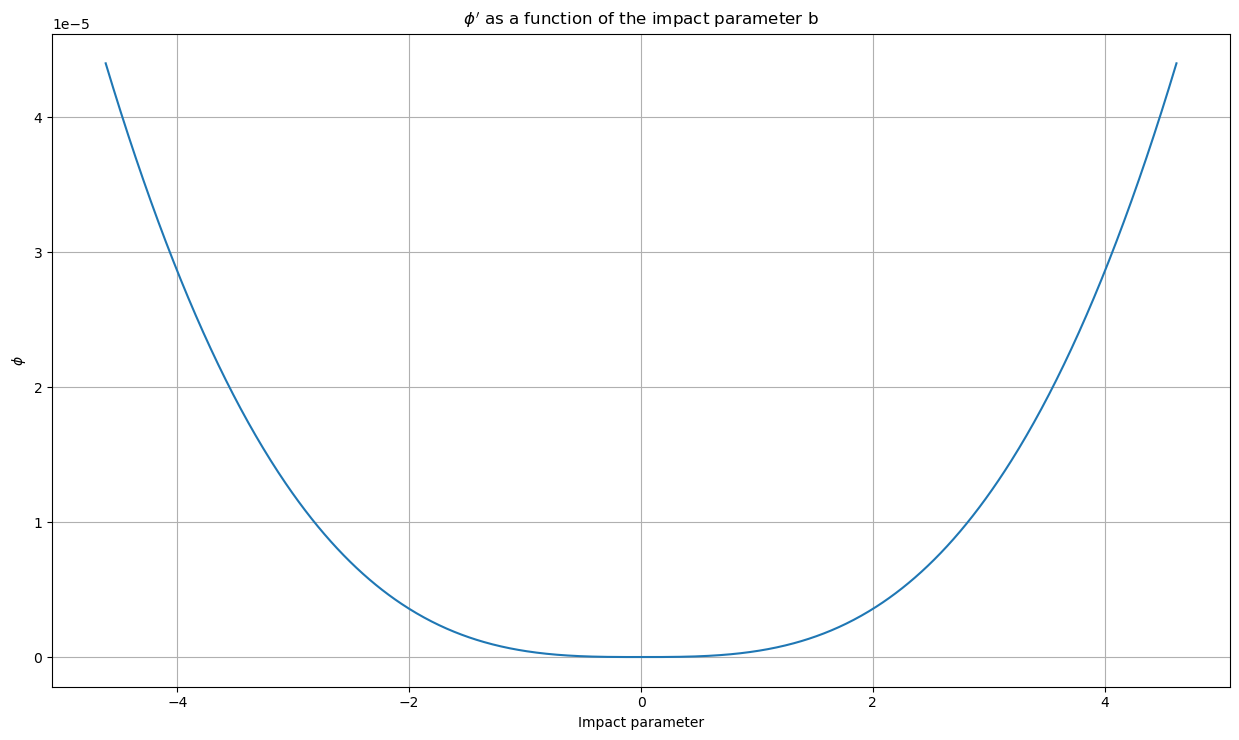

In [27]:
# Numerical evaluation parameters
NB=1000
# Parameters of the BH-probe system
#GM=0.5*Rs
Robs=Rprobe*100
B=np.linspace(-Bmax,Bmax,NB)
phiobs=[]
phifrac=[]
phiclass=[]
phidelta=[]
for b in B:
    phiobstmp=np.arctan(1/np.sqrt((Robs/b)**2-(1-Rsch/Robs)))
    phiclasstmp=np.arctan(abs(b)/Robs)
    phiobs.append(phiobstmp)
    phiclass.append(phiclasstmp) #phiclass.append(abs(b)/Ro))
    phifrac.append(phiobstmp/phiclasstmp)
    phidelta.append(phiobstmp-phiclasstmp)
#Graphs Stuff
plt.rcParams["figure.figsize"] = [12.50, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.title("$\phi'$ as a function of the impact parameter b")
A=plt.ylabel('$\phi$')
A=plt.xlabel('Impact parameter')
plt.grid()
#plt.plot(B,np.array(phiobs)*180/np.pi)
#plt.plot(B,np.array(phiclass)*180/np.pi)
plt.plot(B,np.array(phidelta)*180/np.pi)
plt.show()

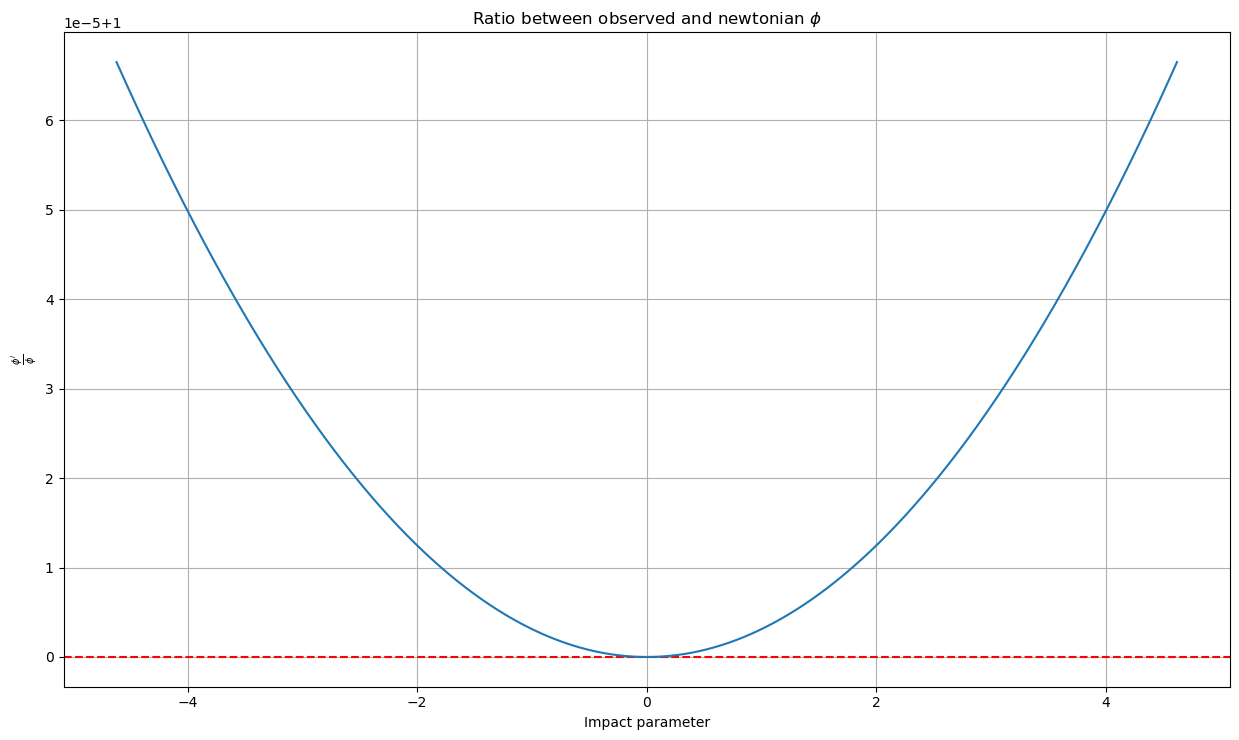

In [30]:
plt.rcParams["figure.figsize"] = [12.50, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Ratio between observed and newtonian $\phi$")
A=plt.ylabel(r'$\frac{\phi^{l}}{\phi}$')
A=plt.xlabel('Impact parameter')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.plot(B,phifrac)
plt.show()

### Impact parameters for different orbits
The closer we get to the Black hole the stronger the deviation from the linear case gets.

<ipython-input-31-5a42bb943deb>:14: RuntimeWarning: divide by zero encountered in double_scalars
  DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))
<ipython-input-31-5a42bb943deb>:34: RuntimeWarning: divide by zero encountered in double_scalars
  DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))
<ipython-input-31-5a42bb943deb>:44: RuntimeWarning: divide by zero encountered in double_scalars
  DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))
<ipython-input-31-5a42bb943deb>:54: RuntimeWarning: divide by zero encountered in double_scalars
  DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))
<ipython-input-31-5a42bb943deb>:64: RuntimeWarning: divide by zero encountered in double_scalars
  DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))


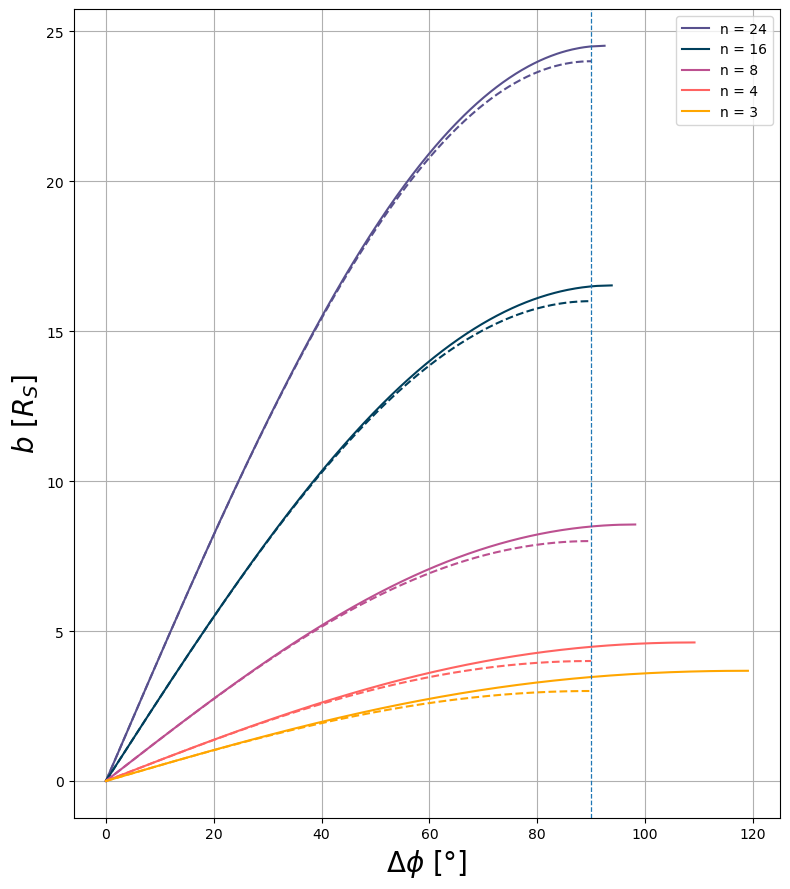

In [31]:
# Parameters of the Black Hole
Rsch=1. #Schwarzchild radius fixed to one
#GM=0.5*Rs #G*M: Fixed by relationship
Ratioprbsch=24# Defined in the problem
Rprobe=Ratioprbsch*Rsch #Radius of orbit: Fixed by problem
Robs=Rsch*2615589 #Distance of observer: Fixed by problem !!Check exact relationship from problem data
# Range of possible impact parameters. We plot only the positive half
Bmax=Rprobe*np.sqrt(Ratioprbsch/(Ratioprbsch-1))
B=np.linspace(0,Bmax,1000)#np.linspace(0,Rprobe,100)# 

Theta=np.array(np.linspace(0,np.pi/2,1000))
DeltaPhi=[]
for b in B:
    DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))
      
#Graphs Stuff
plt.rcParams["figure.figsize"] = [8,9]
plt.rcParams["figure.autolayout"] = True
#plt.title("Parametro d'impatto del fotone emesso dal satellite in funzione della posizione nell'orbita")#plt.title("Impact parameter at a given angle")
A=plt.xlabel('$\Delta \phi$ [°]', fontsize=20)
A=plt.ylabel('$b$ [$R_{S}$]', fontsize=20)
plt.grid()
plt.plot(np.array(DeltaPhi)[:,0]*180/np.pi,B,color='#58508d',label="n = 24")
plt.plot(Theta*180/np.pi,Rprobe*np.sin(Theta),color='#58508d',linestyle='--')



Ratioprbsch=16# Defined in the problem
Rprobe=Ratioprbsch*Rsch #Radius of orbit: Fixed by problem
Bmax=Rprobe*np.sqrt(Ratioprbsch/(Ratioprbsch-1))
B=np.linspace(0,Bmax,1000)#np.linspace(0,Rprobe,100)# 
DeltaPhi=[]
for b in B:
    DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))
plt.plot(np.array(DeltaPhi)[:,0]*180/np.pi,B,color='#003f5c',label="n = 16")
plt.plot(Theta*180/np.pi,Rprobe*np.sin(Theta),color='#003f5c',linestyle='--')

Ratioprbsch=8# Defined in the problem
Rprobe=Ratioprbsch*Rsch #Radius of orbit: Fixed by problem
Bmax=Rprobe*np.sqrt(Ratioprbsch/(Ratioprbsch-1))
B=np.linspace(0,Bmax,1000)#np.linspace(0,Rprobe,100)# 
DeltaPhi=[]
for b in B:
    DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))
plt.plot(np.array(DeltaPhi)[:,0]*180/np.pi,B,color='#bc5090',label="n = 8")
plt.plot(Theta*180/np.pi,Rprobe*np.sin(Theta),color='#bc5090',linestyle='--')

Ratioprbsch=4# Defined in the problem
Rprobe=Ratioprbsch*Rsch #Radius of orbit: Fixed by problem
Bmax=Rprobe*np.sqrt(Ratioprbsch/(Ratioprbsch-1))
B=np.linspace(0,Bmax,1000)#np.linspace(0,Rprobe,100)# 
DeltaPhi=[]
for b in B:
    DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))
plt.plot(np.array(DeltaPhi)[:,0]*180/np.pi,B,color='#ff6361',label="n = 4")
plt.plot(Theta*180/np.pi,Rprobe*np.sin(Theta),color='#ff6361',linestyle='--')

Ratioprbsch=3# Defined in the problem
Rprobe=Ratioprbsch*Rsch #Radius of orbit: Fixed by problem
Bmax=Rprobe*np.sqrt(Ratioprbsch/(Ratioprbsch-1))
B=np.linspace(0,Bmax,1000)#np.linspace(0,Rprobe,100)# 
DeltaPhi=[]
for b in B:
    DeltaPhi.append(integrate.quad(lambda x: 1/(x*np.sqrt((b*x)**-2-1+x*Rsch)), 1/Robs, 1/Rprobe))
plt.plot(np.array(DeltaPhi)[:,0]*180/np.pi,B,color='#ffa600',label="n = 3")
plt.plot(Theta*180/np.pi,Rprobe*np.sin(Theta),color='#ffa600',linestyle='--')

plt.axvline(x=90,linestyle='--',linewidth=0.9)
plt.legend()
plt.show()
